In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(2,16)
        self.linear2 = nn.Linear(16,32)
        self.linear3 = nn.Linear(32,1)
    def forward(self,z):
        x = torch.zeros([batch,9],dtype=torch.float64)
        y = torch.zeros([batch,2], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(9):
            x[:,i] = self.helper(z[:,2*i:2*i+2])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        x1 = x[:,0]
        for i in range(9):
            x1 = x[:,i]          
            #print()
            y = y+torch.mul(x1[:,None],z[:,2*i:2*i+2])
        return y , x 

    
    def helper(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x


In [3]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(2,8)
        self.linear2 = nn.Linear(8,16)
        self.linear3 = nn.Linear(16,3)
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
criterion = nn.CrossEntropyLoss()

In [5]:
y = np.random.randint(0,10,1000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i) 

0 97
1 84
2 89
3 104
4 94
5 124
6 106
7 89
8 101
9 112


In [6]:
x = np.zeros((1000,2))

In [7]:
x[idx[0],:] = np.random.multivariate_normal(mean = [2,2],cov=[[0.01,0],[0,0.01]],size=sum(idx[0]))


x[idx[1],:] = np.random.multivariate_normal(mean = [0,-2],cov=[[0.01,0],[0,0.01]],size=sum(idx[1]))


x[idx[2],:] = np.random.multivariate_normal(mean = [-2,2],cov=[[0.01,0],[0,0.01]],size=sum(idx[2]))



x[idx[3],:] = np.random.multivariate_normal(mean = [0,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[3]))


x[idx[4],:] = np.random.multivariate_normal(mean =[-2,-4] ,cov=[[0.01,0],[0,0.01]],size=sum(idx[4]))



x[idx[5],:] = np.random.multivariate_normal(mean = [2,-4],cov=[[0.01,0],[0,0.01]],size=sum(idx[5]))


x[idx[6],:] = np.random.multivariate_normal(mean = [-4,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[6]))


x[idx[7],:] = np.random.multivariate_normal(mean = [-2,4],cov=[[0.01,0],[0,0.01]],size=sum(idx[7]))


x[idx[8],:] = np.random.multivariate_normal(mean = [2,4],cov=[[0.01,0],[0,0.01]],size=sum(idx[8]))


x[idx[9],:] = np.random.multivariate_normal(mean = [4,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[9]))


In [8]:
# y = np.random.randint(0,10,1000)
idx= []
for i in range(10):
    #print(i,sum(y==i))
    idx.append(y==i)

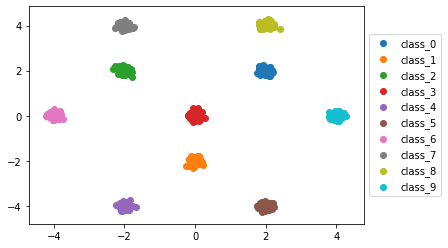

In [9]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
foreground_classes = {'class_0','class_1', 'class_2'}

background_classes = {'class_3','class_4', 'class_5', 'class_6','class_7', 'class_8', 'class_9'}

In [11]:
fg_class  = np.random.randint(0,3)
fg_idx = np.random.randint(0,9)

a = []
for i in range(9):
    if i == fg_idx:
        b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
        a.append(x[b])
        print("foreground "+str(fg_class)+" present at " + str(fg_idx))
    else:
        bg_class = np.random.randint(3,10)
        b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
        a.append(x[b])
        print("background "+str(bg_class)+" present at " + str(i))
a = np.concatenate(a,axis=0)
print(a.shape)

print(fg_class , fg_idx)

foreground 1 present at 0
background 5 present at 1
background 3 present at 2
background 4 present at 3
background 7 present at 4
background 9 present at 5
background 9 present at 6
background 9 present at 7
background 7 present at 8
(9, 2)
1 0


In [12]:
desired_num = 3000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(18,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [13]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
#print(mosaic_list)

In [14]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [15]:
where = Wherenet().double()
what = Whatnet().double()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.01, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.01, momentum=0.9)

nos_epochs = 100

train_loss=[]
train_loss_tot=[]
test_loss =[]
train_acc = []
test_acc = []
fg_grad=[]
bg_grad=[]
for epoch in range(nos_epochs):  # loop over the dataset multiple times
    
    running_loss = 0.0
    running_acc = 0.0
    cnt=0
    loss_alpha_fg = 0
    loss_alpha_bg = 0
    iteration = desired_num // batch
    
    for i, data in  enumerate(train_loader):
        inputs , labels , fidx = data
        
        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        avg_inp,alphas = where(inputs)
        
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels) 
        
        grd = torch.autograd.grad(loss,alphas,retain_graph=True)
        
        one_hot_fg = torch.zeros(len(fidx),fidx.max()+1).scatter_(1,fidx.unsqueeze(1),1.)
        one_hot_bg = (1-one_hot_fg)/8
        loss_alpha_fg += torch.sum(torch.sum(torch.mul(one_hot_fg, grd[0]),dim=1))
        loss_alpha_bg += torch.sum(torch.sum(torch.mul(one_hot_bg, grd[0]),dim=1))
 
        loss.backward(retain_graph =True)
        
        optimizer_where.step()
        optimizer_what.step()
        
        running_loss += loss.item()
        if cnt % 4 == 3:    # print every 6 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 4))
#             print('[%d,%5d] accuracy: %.3f' %(epoch + 1, cnt+1,running_acc/desired_num))
            running_loss = 0.0
            train_loss.append(running_loss)
#             train_acc.append(running_acc /desired_num)
            running_acc = 0
        cnt=cnt+1
        
        
    fg_grad.append(loss_alpha_fg.item()/desired_num)
    bg_grad.append(loss_alpha_bg.item()/desired_num)
    
    with torch.no_grad():
        correct = 0
        total = 0
        train_loss_epoch = 0
        for data in train_loader:
            
            inputs, labels , fore_idx = data
            avg_inp,alphas = where(inputs)
            outputs = what(avg_inp)
            _, predicted = torch.max(outputs.data, 1)
            train_loss_epoch += criterion(outputs, labels).item()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_loss_tot.append(train_loss_epoch)
    print('Accuracy of the network on the 3000 train images: %d %%' % (100 * correct / total))
print("finished training")
    
    

[1,     4] loss: 1.110
[1,     8] loss: 1.101
[1,    12] loss: 1.100
Accuracy of the network on the 3000 train images: 32 %
[2,     4] loss: 1.098
[2,     8] loss: 1.096
[2,    12] loss: 1.093
Accuracy of the network on the 3000 train images: 41 %
[3,     4] loss: 1.092
[3,     8] loss: 1.089
[3,    12] loss: 1.090
Accuracy of the network on the 3000 train images: 38 %
[4,     4] loss: 1.088
[4,     8] loss: 1.088
[4,    12] loss: 1.084
Accuracy of the network on the 3000 train images: 38 %
[5,     4] loss: 1.086
[5,     8] loss: 1.081
[5,    12] loss: 1.080
Accuracy of the network on the 3000 train images: 40 %
[6,     4] loss: 1.081
[6,     8] loss: 1.078
[6,    12] loss: 1.078
Accuracy of the network on the 3000 train images: 41 %
[7,     4] loss: 1.074
[7,     8] loss: 1.070
[7,    12] loss: 1.080
Accuracy of the network on the 3000 train images: 42 %
[8,     4] loss: 1.072
[8,     8] loss: 1.071
[8,    12] loss: 1.068
Accuracy of the network on the 3000 train images: 44 %
[9,     

[66,     4] loss: 0.001
[66,     8] loss: 0.001
[66,    12] loss: 0.001
Accuracy of the network on the 3000 train images: 100 %
[67,     4] loss: 0.001
[67,     8] loss: 0.001
[67,    12] loss: 0.001
Accuracy of the network on the 3000 train images: 100 %
[68,     4] loss: 0.001
[68,     8] loss: 0.001
[68,    12] loss: 0.001
Accuracy of the network on the 3000 train images: 100 %
[69,     4] loss: 0.001
[69,     8] loss: 0.001
[69,    12] loss: 0.001
Accuracy of the network on the 3000 train images: 100 %
[70,     4] loss: 0.001
[70,     8] loss: 0.001
[70,    12] loss: 0.001
Accuracy of the network on the 3000 train images: 100 %
[71,     4] loss: 0.001
[71,     8] loss: 0.001
[71,    12] loss: 0.001
Accuracy of the network on the 3000 train images: 100 %
[72,     4] loss: 0.001
[72,     8] loss: 0.001
[72,    12] loss: 0.001
Accuracy of the network on the 3000 train images: 100 %
[73,     4] loss: 0.001
[73,     8] loss: 0.001
[73,    12] loss: 0.001
Accuracy of the network on the 3

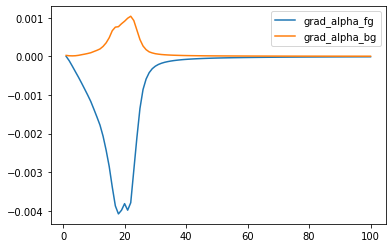

In [26]:
x = np.arange(1,nos_epochs+1)
# print(x)
plt.plot(x,fg_grad,label = "grad_alpha_fg")
plt.plot(x,bg_grad, label = "grad_alpha_bg")

plt.legend()

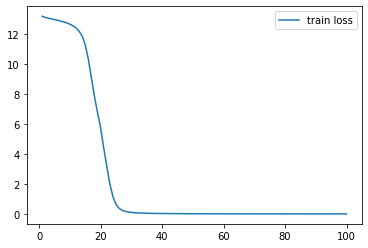

In [28]:
plt.plot(x,train_loss_tot, label = "train loss")
plt.legend()

In [18]:
xs,ys,fidx = iter(train_loader).next()

In [19]:
avg_data,alpha = where(xs)
out = what(avg_data)
_, predicted = torch.max(out.data, 1)
loss = criterion(out, ys) 

In [20]:
grd = torch.autograd.grad(loss,alpha,retain_graph=True)

In [21]:
grd[0]

tensor([[-1.9167e-06,  1.6276e-06, -3.1370e-05,  ...,  1.5269e-07,
         -1.9880e-05, -5.9290e-07],
        [-1.8939e-06, -6.2522e-06,  4.6521e-06,  ..., -2.6000e-06,
         -6.3848e-06,  1.7945e-06],
        [ 1.2374e-05, -2.3803e-06, -9.0957e-06,  ...,  4.0808e-08,
         -4.8540e-08, -1.2320e-05],
        ...,
        [ 5.9950e-07, -1.2415e-07, -8.2883e-06,  ...,  8.3596e-06,
         -3.4348e-08, -6.6342e-06],
        [-7.4326e-06,  1.7721e-05,  9.5417e-06,  ...,  1.7737e-05,
          9.5043e-06,  7.8555e-06],
        [-5.6302e-06,  4.2903e-06, -2.6275e-07,  ..., -4.1510e-06,
          1.0816e-06,  4.2823e-06]], dtype=torch.float64)

In [22]:
one_hot = torch.zeros(len(fidx),fidx.max()+1).scatter_(1,fidx.unsqueeze(1),1.)


In [23]:
s = torch.sum(torch.sum(torch.mul(one_hot, grd[0]),dim=1))
torch.sum(s)

tensor(-0.0035, dtype=torch.float64)

In [24]:
(1-one_hot[0])/8

tensor([0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.0000, 0.1250])

In [25]:
torch.mul(one_hot[1], grd[0][1])

tensor([-0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00, -0.0000e+00,
         0.0000e+00, -2.6000e-06, -0.0000e+00,  0.0000e+00],
       dtype=torch.float64)